In [1]:
import numpy as np
import sympy as sp
from IPython.display import display
sp.init_printing(use_latex=True, latex_mode='plain', scale=1.5, fontsize=10)

In [2]:
w, t, tau_s, tau_m, delay = sp.symbols('w t tau_s tau_m t_delay', real=True, positive=True)

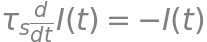

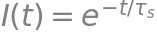

In [3]:
t = sp.symbols('t', real=True)
I = sp.Function('I')(t)
ode_I = sp.Eq(tau_s * sp.Derivative(I, t), -I)
display(ode_I)
soln = sp.dsolve(ode_I, I, ics={I.subs(t, 0): 1})
display(soln)

In [4]:
sp.lambdify(t, soln.rhs.subs({tau_s: 1.0}), 'numpy')(np.arange(0, 30))

array([1.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
       3.35462628e-04, 1.23409804e-04, 4.53999298e-05, 1.67017008e-05,
       6.14421235e-06, 2.26032941e-06, 8.31528719e-07, 3.05902321e-07,
       1.12535175e-07, 4.13993772e-08, 1.52299797e-08, 5.60279644e-09,
       2.06115362e-09, 7.58256043e-10, 2.78946809e-10, 1.02618796e-10,
       3.77513454e-11, 1.38879439e-11, 5.10908903e-12, 1.87952882e-12,
       6.91440011e-13, 2.54366565e-13])

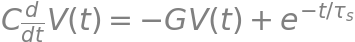

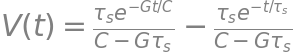

In [5]:
C, G = sp.symbols('C G', real=True, positive=True)
V = sp.Function('V')(t)
ode_V = sp.Eq(C * sp.Derivative(V, t), - G * V + I).subs(I, soln.rhs)
display(ode_V)
soln_V = sp.dsolve(ode_V, V, ics={V.subs(t, 0): 0})
display(soln_V)

In [6]:
soln_V = soln_V.subs({C:G*tau_m})
soln_V = soln_V.subs({G:1})

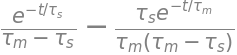

In [ ]:
soln_V.diff(t)

In [8]:
TAU_D = 10.
TAU_R = 1.

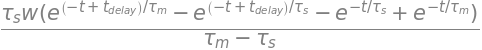

In [9]:
psp = w * tau_s /(tau_m - tau_s) * ((sp.exp(-t/tau_m)-sp.exp(-t/tau_s)) + (sp.exp(-(t-delay)/tau_m)-sp.exp(-(t-delay)/tau_s)))
psp

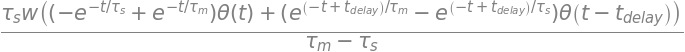

In [10]:
psp_w_heaviside = w * tau_s /(tau_m - tau_s) * ((sp.exp(-t/tau_m)-sp.exp(-t/tau_s)) * sp.Heaviside(t) + (sp.exp(-(t-delay)/tau_m)-sp.exp(-(t-delay)/tau_s)) * sp.Heaviside(t-delay))
psp_w_heaviside

In [11]:
sp.lambdify(t, psp_w_heaviside.subs({tau_s: 1.0, tau_m: 10.0, delay: 0.0, w: .5}), 'numpy')(np.arange(0, 30))

array([0.        , 0.059662  , 0.07593283, 0.07678124, 0.07244493,
       0.06664363, 0.06070365, 0.05507482, 0.04988817, 0.04516069,
       0.04087045, 0.03698382, 0.03346534, 0.03028106, 0.02739957,
       0.02479221, 0.02243293, 0.02029816, 0.01836654, 0.01661873,
       0.01503725, 0.01360627, 0.01231146, 0.01113987, 0.01007977,
       0.00912056, 0.00825262, 0.00746728, 0.00675667, 0.00611369])

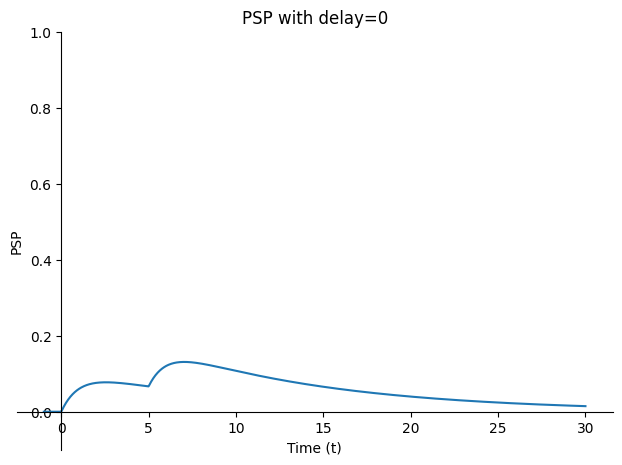

In [12]:
sp.plot(psp_w_heaviside, (t, -1, 30), params={w: 1, tau_s: 1., tau_m: 10., delay: 5}, title='PSP with delay=0', ylabel='PSP', xlabel='Time (t)',
        ylim=(-0.1, 1), axis_center=(0, 0))

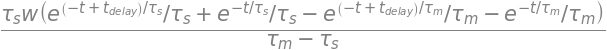

In [13]:
psp_dot = sp.diff(psp, t)
psp_dot

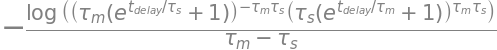

In [14]:
eq_argmax_t = sp.Eq(psp_dot.expand(), 0)
argmax_t = sp.solve(eq_argmax_t, t)[0]
argmax_t

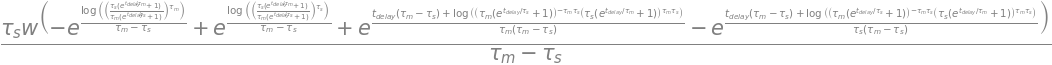

In [15]:
psp_max = sp.simplify(psp.subs(t, argmax_t))
psp_max

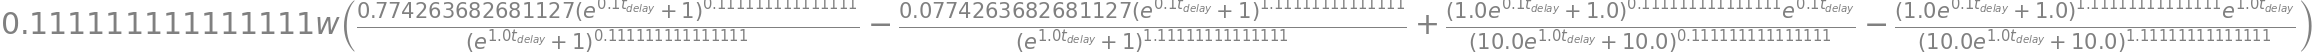

In [16]:
psp_max = psp_max.subs({tau_m: TAU_D, tau_s: TAU_R})
psp_max

In [17]:
w_eq = sp.Eq(psp_max.subs(delay, 1.), 1)
w_eq

In [18]:
sp.solve(w_eq, w)

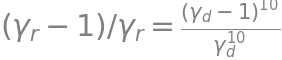

In [19]:
# Gamma is for discrete-time decay, which is tau in SpikingJelly.
# (But note that gamma = exp(1/tau): In fact, it is not real time constant, but discrete-time decay factor.)

gamma_r, gamma_d = sp.symbols('gamma_r gamma_d')
eq_gamma = sp.Eq((gamma_r - 1)/gamma_r, ((gamma_d - 1)/gamma_d)**10)
eq_gamma

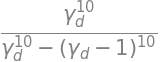

In [20]:
gamma_soln = sp.simplify(sp.solve(eq_gamma, gamma_r)[0])
gamma_soln

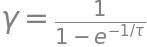

In [21]:
from sympy.abc import tau, gamma

sp.Eq(gamma, 1/(1 - sp.exp(-1/tau)))

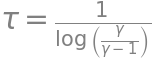

In [22]:
sp.Eq(tau, sp.solve(sp.Eq(gamma, 1/(1 - sp.exp(-1/tau))), tau)[0])

In [23]:
# Convert tau to spkingjelly alpha

GAMMA_D = 1/(1 - sp.exp(-1/TAU_D))
GAMMA_R = 1/(1 - sp.exp(-1/TAU_R))
GAMMA_R, GAMMA_D

In [24]:
gamma_soln.evalf(subs={gamma_d: GAMMA_D})